In [25]:
from keras.applications import VGG16
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator 
from keras import models
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt

In [2]:
conv_base = VGG16(weights='imagenet',
                 include_top=False,
                input_shape =(150,150,3) )


In [3]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [4]:
base_dir = '/home/a/Downloads/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [5]:
print(train_dir)
print(validation_dir)
print(test_dir)

/home/a/Downloads/cats_and_dogs_small/train
/home/a/Downloads/cats_and_dogs_small/validation
/home/a/Downloads/cats_and_dogs_small/test


In [6]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [7]:
def extract_features(directory, sample_count):
    features = np.zeros(shape = (sample_count,4,4,512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150,150),
        batch_size=batch_size,
        class_mode = 'binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i+1) * batch_size] = features_batch
        labels[i*batch_size:(i+1)*batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [8]:
train_features, train_labels = extract_features(train_dir,2000)
validation_features, validation_labels = extract_features(validation_dir,1000)
test_features, test_labels = extract_features(test_dir,1000)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [29]:
print(type(train_features))
print(train_features.shape)
print(train_features.shape)
# print(train_features[0][0][0])
# plt.imshow(train_features[0])


<class 'numpy.ndarray'>
(2000, 8192)
(2000, 8192)


In [15]:
train_features = np.reshape(train_features,(2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

In [20]:
print(train_features.shape)
print(train_labels)

(2000, 8192)
[0. 0. 0. ... 0. 1. 0.]


In [18]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=8192))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

In [19]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
             loss='binary_crossentropy',
             metrics = ['acc'])

In [21]:
history = model.fit(train_features, train_labels,
                   epochs = 30,
                   batch_size=20,
                   validation_data=(validation_features,validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 47s 24ms/step - loss: 0.6026 - acc: 0.6755 - val_loss: 0.4512 - val_acc: 0.8290
Epoch 2/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.4286 - acc: 0.8155 - val_loss: 0.3732 - val_acc: 0.8620
Epoch 3/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.3631 - acc: 0.8490 - val_loss: 0.3250 - val_acc: 0.8840
Epoch 4/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.3106 - acc: 0.8805 - val_loss: 0.2998 - val_acc: 0.8880
Epoch 5/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2936 - acc: 0.8840 - val_loss: 0.2851 - val_acc: 0.8910
Epoch 6/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2697 - acc: 0.8910 - val_loss: 0.2761 - val_acc: 0.8880
Epoch 7/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2472 - acc: 0.9035 - val_loss: 0.2677 - val_acc: 0.8900
Epoch 8/30
2

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [23]:
epochs = range(1, len(acc) + 1)

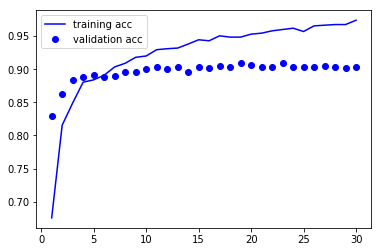

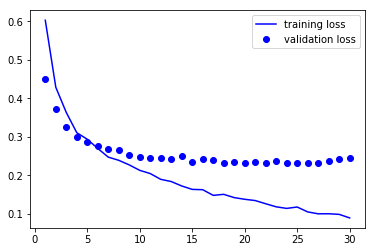

In [27]:
plt.plot(epochs, acc, 'b',label = 'training acc')
plt.plot(epochs, val_acc, 'bo', label='validation acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss , 'b' , label = 'training loss')
plt.plot(epochs, val_loss , 'bo' , label='validation loss')
plt.legend()

plt.show()